# Algorytmy macierzowe
## lab 1

In [2]:
import numpy as np
from time import time
from matplotlib import pyplot as plt

Generowanie macierzy

In [3]:
def random_matrix(matrix_size, min_val, max_val):
    """Return matrix with random floats from [min_val, max_val)"""
    return (max_val - min_val) * np.random.random(matrix_size) + min_val

In [4]:
exp = 4
matrix_size = (exp, exp)

min_val = 0.00000001
max_val = 1

A = random_matrix(matrix_size, min_val, max_val)
B = random_matrix(matrix_size, min_val, max_val)

Standardowe mnożenie macierzy

In [5]:
def standard_mlt(A, B):
    """Return tuple with mlt result and no_operations"""
    operation_count = 0
    result = np.zeros((len(A), len(A)), dtype=float)
    for i in range(len(A)):
        for j in range(len(B[0])):
               for k in range(len(B)):
                    result[i][j] += A[i][k] * B[k][j]
                    operation_count += 2
    return result, operation_count

### 1. Rekurencyjne mnożenie macierzy metodą Binet`a (10 punktów)

In [6]:
def binet_mlt(A, B):
    global operation_count
    
    if len(A) != len(B):
        print("ERROR: Wrong matrix dimensions!")
    elif len(A) == 2:
        a00 = A[0,0]*B[0,0] + A[0,1]*B[1,0]
        a01 = A[0,0]*B[0,1] + A[0,1]*B[1,1]
        
        a10 = A[1,0]*B[0,0] + A[1,1]*B[1,0]
        a11 = A[1,0]*B[0,1] + A[1,1]*B[1,1]
        
        operation_count += 12
        return np.array([[a00,a01],
                         [a10,a11]])
    else:
        matrix_size = len(A)
        
        A11 = A[:matrix_size//2, :matrix_size//2]
        A12 = A[:matrix_size//2, matrix_size//2:]
        A21 = A[matrix_size//2:, :matrix_size//2]
        A22 = A[matrix_size//2:, matrix_size//2:]

        B11 = B[:matrix_size//2, :matrix_size//2]
        B12 = B[:matrix_size//2, matrix_size//2:]
        B21 = B[matrix_size//2:, :matrix_size//2]
        B22 = B[matrix_size//2:, matrix_size//2:]
        
        C11 = binet_mlt(A11, B11) + binet_mlt(A12, B21)
        C12 = binet_mlt(A11, B12) + binet_mlt(A12, B22)
        C21 = binet_mlt(A21, B11) + binet_mlt(A22, B21)
        C22 = binet_mlt(A21, B12) + binet_mlt(A22, B22)
        operation_count += matrix_size ** 2
        
        return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

In [7]:
operation_count = 0
res = binet_mlt(A, B)

print(f"Matrix size: 2**{exp}")
print("Is correct?:", np.allclose(res, A@B))
print("Number of operations:", operation_count)
print("Number of operations (Standard mlt):", standard_mlt(A, B)[1])
# print("Result:", res, sep='\n')

Matrix size: 2**4
Is correct?: True
Number of operations: 112
Number of operations (Standard mlt): 128


### 2. Rekurencyjne mnożenie macierzy metodą Strassena (10 punktów)

In [8]:
def strassen_mlt(A,B):
    global operation_count
    
    n = len(A)
    if(n==2):
        a00 = A[0,0]*B[0,0] + A[0,1]*B[1,0]
        a01 = A[0,0]*B[0,1] + A[0,1]*B[1,1]
        
        a10 = A[1,0]*B[0,0] + A[1,1]*B[1,0]
        a11 = A[1,0]*B[0,1] + A[1,1]*B[1,1]
        
        operation_count += 12
        return np.array([[a00,a01],
                        [a10,a11]])
    
    A11 = A[:n//2, :n//2]
    B11 = B[:n//2, :n//2]
    
    A12 = A[:n//2, (n//2):]
    B12 = B[:n//2, (n//2):]
    
    A21 = A[(n//2): , :n//2]
    B21 = B[(n//2): , :n//2]
    
    A22 = A[(n//2): , (n//2):]
    B22 = B[(n//2): , (n//2):]

    P1 = strassen_mlt((A11 + A22), (B11 + B22))
    P2 = strassen_mlt((A21 + A22), B11)
    P3 = strassen_mlt(A11, (B12 - B22))
    P4 = strassen_mlt(A22, (B21 - B11))
    P5 = strassen_mlt((A11 + A12), B22)
    P6 = strassen_mlt((A21 - A11), (B11 + B12))
    P7 = strassen_mlt((A12 - A22), (B21 + B22))
    
    C11 = (P1 + P4 - P5 + P7)
    C12 = (P3 + P5)
    C21 = (P2 + P4)
    C22 = (P1 - P2 + P3 + P6)
    
    operation_count += 18 * len(P1)
    
    '''top_row = np.hstack((C11, C12))
    bottom_row = np.hstack((C21, C22))
    result = np.vstack((top_row, bottom_row))'''

    result = np.empty((n, n))
    result[:n // 2, :n // 2] = C11
    result[:n // 2, n // 2:] = C12
    result[n // 2:, :n // 2] = C21
    result[n // 2:, n // 2:] = C22
    
    return result

In [9]:
operation_count = 0
res = strassen_mlt(A, B)

print(f"Matrix size: 2**{exp}")
print("Is correct?:", np.allclose(res, A@B))
print("Number of operations:", operation_count)
print("Number of operations (Standard mlt):", standard_mlt(A, B)[1])
# print("Result:", res, sep='\n')

Matrix size: 2**4
Is correct?: True
Number of operations: 120
Number of operations (Standard mlt): 128


### 3. Mnożenie macierzy metodą znalezioną przez sztuczną inteligencję (10 punktów)

### Testy

In [10]:
exponents = [2, 4, 8, 16, 32, 64, 128, 256]

In [11]:
res_times = []
res_operations = []

for exp in exponents:
    A = random_matrix((exp, exp), min_val, max_val)
    B = random_matrix((exp, exp), min_val, max_val)
    
    t_start = time()
    std_op = standard_mlt(A, B)[1]
    std_time = time() - t_start
    
    operation_count = 0
    t_start = time()
    binet_mlt(A, B)
    bin_time = time() - t_start
    bin_op = operation_count
    
    operation_count = 0
    t_start = time()
    strassen_mlt(A, B)
    str_time = time() - t_start
    str_op = operation_count
    
    res_times.append((std_time, bin_time, str_time))
    res_operations.append((std_op, bin_op, str_op))

Wykresy

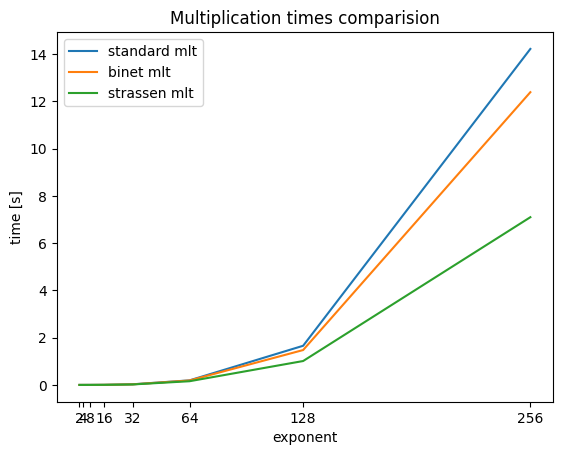

In [17]:
plt.plot(exponents, res_times)
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents)
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times256")
plt.show()

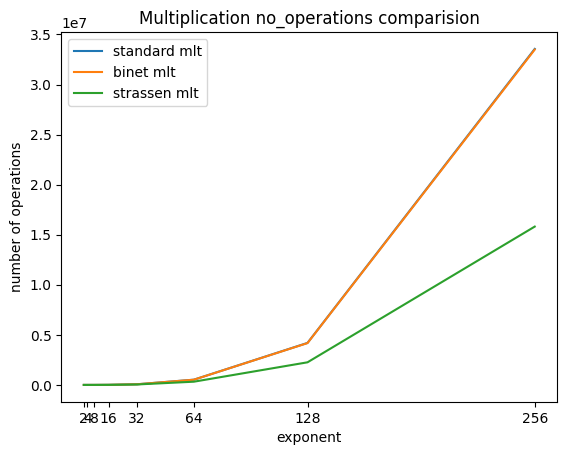

In [18]:
plt.plot(exponents, res_operations)
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents)
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations256")
plt.show()

Wykresy dla małej liczby elementów

In [19]:
no_elements = 4

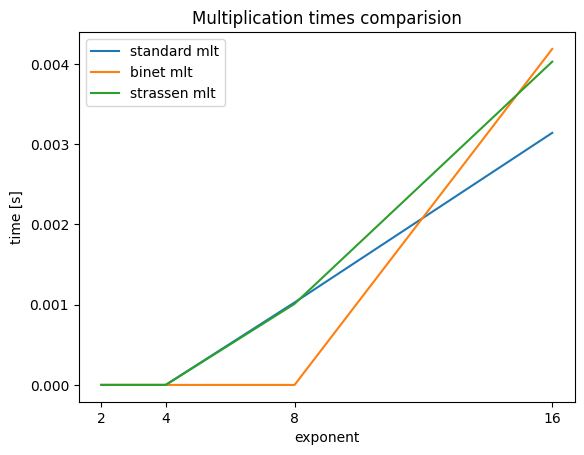

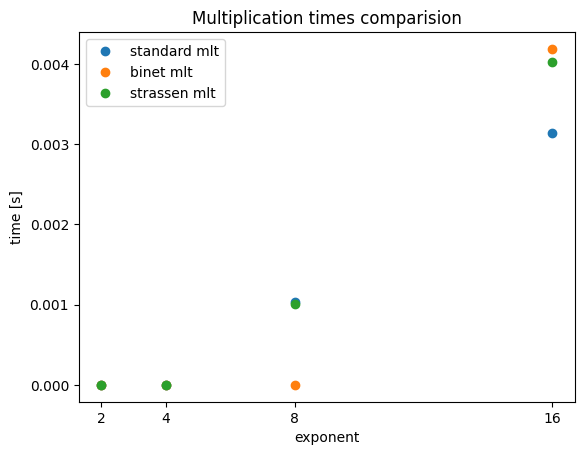

In [20]:
plt.plot(exponents[:no_elements], res_times[:no_elements])
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times16")
plt.show()

plt.plot(exponents[:no_elements], res_times[:no_elements], 'o')
plt.title("Multiplication times comparision")
plt.xlabel("exponent")
plt.ylabel("time [s]")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/times16_o")
plt.show()

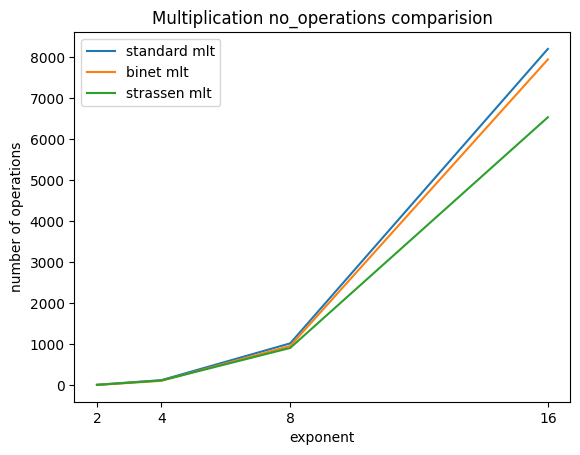

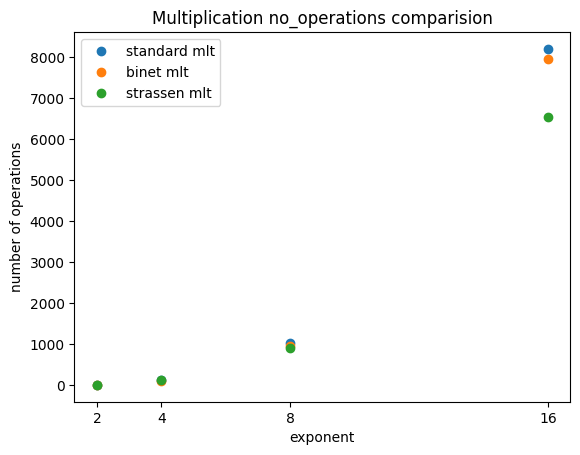

In [21]:
plt.plot(exponents[:no_elements], res_operations[:no_elements])
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations16")
plt.show()

plt.plot(exponents[:no_elements], res_operations[:no_elements], 'o')
plt.title("Multiplication no_operations comparision")
plt.xlabel("exponent")
plt.ylabel("number of operations")
plt.xticks(exponents[:no_elements])
plt.legend(("standard mlt", "binet mlt", "strassen mlt"))
plt.savefig("./img/operations16_o")
plt.show()